In [3]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter

# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
#from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import File:
mcf7 = pd.read_csv('V1/mcf7_V1.csv')
breast = pd.read_csv('V1/breast_V1.csv')
lung = pd.read_csv('V1/lung_V1.csv')
a549 = pd.read_csv('V1/a549_V1.csv')

In [5]:
print('MCF7 :',len(mcf7))
print('Breast :',len(breast))
print('Lung :',len(lung))
print('A549 :',len(a549))

MCF7 : 454
Breast : 548
Lung : 592
A549 : 375


In [6]:
mcf7["mol"] = [Chem.MolFromSmiles(x) for x in mcf7["CanonicalSMILES"]]
breast["mol"] = [Chem.MolFromSmiles(x) for x in breast["CanonicalSMILES"]]
lung["mol"] = [Chem.MolFromSmiles(x) for x in lung["CanonicalSMILES"]]
a549["mol"] = [Chem.MolFromSmiles(x) for x in a549["CanonicalSMILES"]]

In [7]:
print('MCF7 SMiles:',mcf7['CanonicalSMILES'].count())
print('Breast Smiles:',breast['CanonicalSMILES'].count())
print('lung Smiles:',lung['CanonicalSMILES'].count())
print('A549 Smiles:',a549['CanonicalSMILES'].count())

MCF7 SMiles: 454
Breast Smiles: 548
lung Smiles: 592
A549 Smiles: 375


In [8]:
# Maccs
mcf7["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in mcf7["mol"]]
breast["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in breast["mol"]]
lung["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in lung["mol"]]
a549["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in a549["mol"]]

In [9]:
# Morgan 2:
mcf7["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in mcf7["mol"]]
breast["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in breast["mol"]]
lung["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in lung["mol"]]
a549["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in a549["mol"]]

In [10]:
train_mcf7, test_mcf7 = train_test_split(mcf7, test_size=0.2, random_state=1,stratify=mcf7.Target.values)
train_breast, test_breast = train_test_split(breast, test_size=0.2, random_state=1,stratify=breast.Target.values)
train_lung, test_lung = train_test_split(lung, test_size=0.2, random_state=1,stratify=lung.Target.values)
train_a549, test_a549 = train_test_split(a549, test_size=0.2, random_state=1,stratify=a549.Target.values)

print('Training Data for MCF7:',len(train_mcf7),'\n')
print('Testing Data for MCF7:',len(test_mcf7),'\n')
print('***************************************************************************')
print('Training Data for Breast:',len(train_breast),'\n')
print('Testing Data for Breast:',len(test_breast),'\n')
print('***************************************************************************')
print('Training Data for lung:',len(train_lung),'\n')
print('Testing Data for lung:',len(test_lung),'\n')
print('***************************************************************************')
print('Training Data for a549:',len(train_a549),'\n')
print('Testing Data for a549:',len(test_a549),'\n')

Training Data for MCF7: 363 

Testing Data for MCF7: 91 

***************************************************************************
Training Data for Breast: 438 

Testing Data for Breast: 110 

***************************************************************************
Training Data for lung: 473 

Testing Data for lung: 119 

***************************************************************************
Training Data for a549: 300 

Testing Data for a549: 75 



In [11]:
def Counting(y):
    unique, counts = np.unique(y, return_counts=True)
    a=dict(zip(unique, counts))
    return str(a)

In [12]:
print('Train Set for MCF7 has:',Counting(train_mcf7['Target']))
print('Test Set for MCF7 has:',Counting(test_mcf7['Target']))
print('*********************************************************************')
print('Train Set for Breast has:',Counting(train_breast['Target']))
print('Test Set for Breast has:',Counting(test_breast['Target']))
print('*********************************************************************')
print('Train Set for Lung has:',Counting(train_lung['Target']))
print('Test Set for Lung has:',Counting(test_lung['Target']))
print('*********************************************************************')
print('Train Set for A549 has:',Counting(train_a549['Target']))
print('Test Set for A549 has:',Counting(test_a549['Target']))

Train Set for MCF7 has: {0: 204, 1: 159}
Test Set for MCF7 has: {0: 51, 1: 40}
*********************************************************************
Train Set for Breast has: {0: 236, 1: 202}
Test Set for Breast has: {0: 59, 1: 51}
*********************************************************************
Train Set for Lung has: {0: 249, 1: 224}
Test Set for Lung has: {0: 63, 1: 56}
*********************************************************************
Train Set for A549 has: {0: 157, 1: 143}
Test Set for A549 has: {0: 39, 1: 36}


In [13]:
def to_bit(fps):
    fp_np = []
    for fp in fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_np.append(arr)
    test = fp_np
    return test

### Maccs:

In [14]:
# MACCS Fingreprint:  # MCF7
X_Macc_train_mcf7=to_bit(train_mcf7['Maccs'])
y_Macc_train_mcf7=train_mcf7.Target.values

X_Macc_test_mcf7=to_bit(test_mcf7['Maccs'])
y_Macc_test_mcf7=test_mcf7.Target.values

In [15]:
# MACCS Fingreprint:  #Breast
X_Macc_train_breast=to_bit(train_breast['Maccs'])
y_Macc_train_breast=train_breast.Target.values

X_Macc_test_breast=to_bit(test_breast['Maccs'])
y_Macc_test_breast=test_breast.Target.values

In [16]:
# MACCS Fingreprint:  # Lung
X_Macc_train_lung=to_bit(train_lung['Maccs'])
y_Macc_train_lung=train_lung.Target.values

X_Macc_test_lung=to_bit(test_lung['Maccs'])
y_Macc_test_lung=test_lung.Target.values

In [17]:
# MACCS Fingreprint:  # A549
X_Macc_train_a549=to_bit(train_a549['Maccs'])
y_Macc_train_a549=train_a549.Target.values

X_Macc_test_a549=to_bit(test_a549['Maccs'])
y_Macc_test_a549=test_a549.Target.values

### Morgan2:

In [18]:
# Morgan 2 Fingreprint:   #MCF7
X_Morgan2_train_mcf7=to_bit(train_mcf7['morg2_fp'])
y_Morgan2_train_mcf7=train_mcf7.Target.values

X_Morgan2_test_mcf7=to_bit(test_mcf7['morg2_fp'])
y_Morgan2_test_mcf7=test_mcf7.Target.values

In [19]:
# Morgan 2 Fingreprint:  #Breast
X_Morgan2_train_breast=to_bit(train_breast['morg2_fp'])
y_Morgan2_train_breast=train_breast.Target.values

X_Morgan2_test_breast=to_bit(test_breast['morg2_fp'])
y_Morgan2_test_breast=test_breast.Target.values

In [20]:
# Morgan 2 Fingreprint:   #Lung
X_Morgan2_train_lung=to_bit(train_lung['morg2_fp'])
y_Morgan2_train_lung=train_lung.Target.values

X_Morgan2_test_lung=to_bit(test_lung['morg2_fp'])
y_Morgan2_test_lung=test_lung.Target.values

In [21]:
# Morgan 2 Fingreprint:   #A549
X_Morgan2_train_a549=to_bit(train_a549['morg2_fp'])
y_Morgan2_train_a549=train_a549.Target.values

X_Morgan2_test_a549=to_bit(test_a549['morg2_fp'])
y_Morgan2_test_a549=test_a549.Target.values

### Models:

<ol>
<li>Random forest (RF)</li>
<li>SVM</li>
<li>KNN</li>
<li>eXtreme Gradient Boosting (XGBoost)</li>
</ol>

In [22]:
def permonce_measure(y_test,y_pred):
    print("Accuracy Score:", round(accuracy_score(y_test, y_pred),3))
    print('Balanced Accuracy:',round(balanced_accuracy_score(y_test,y_pred),3))
    print("MCC Score:",round(matthews_corrcoef(y_test, y_pred),3))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    a3= Sensitivity = tp/(tp+fn)
    a4= Specificity = tn/(tn+fp)
    print("Sensitivity Score:",round(a3,3))
    print("Specificity Score:",round(a4,3))
    
    test_measure = {"Accuracy_test":round(accuracy_score(y_test, y_pred),3),
                    "Balanced Accuracy_test":round(balanced_accuracy_score(y_test,y_pred),3),
                    "MCC Score_test":round(matthews_corrcoef(y_test, y_pred),3),
                    "Sensitivity Score_test":round(a3,3),
                    "Specificity Score_test":round(a4,3)
                   }
    score=accuracy_score(y_test, y_pred)
    cm_macc_test = metrics.confusion_matrix(y_test, y_pred)
    #Graph:
    print('\n********************** Graph *****************************\n')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_macc_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return test_measure

def roc_auc(y_val,prediction_probs,model_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_val))]
    # keep probabilities for the positive outcome only
    prediction_probs = prediction_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_val, ns_probs)
    prediction_probs_auc = roc_auc_score(y_val, prediction_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('ROC AUC=%.3f' % (prediction_probs_auc))
    roc_auc = {"AUC_Score_test":round(prediction_probs_auc,3)}
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    prediction_probs_fpr, prediction_probs_tpr, _ = roc_curve(y_val, prediction_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(prediction_probs_fpr, prediction_probs_tpr, marker='.', label=model_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return roc_auc

def cv_result(best_model,X_train,y_train):
    scoring={'accuracy':'accuracy',
            'balanced_accuracy':'balanced_accuracy',
            'roc_auc':'roc_auc',
            'specificity':make_scorer(recall_score,pos_label=0),
            'sensitivity':make_scorer(recall_score,pos_label=1),
            'MCC':make_scorer(matthews_corrcoef)}
    cv=cross_validate(best_model,X_train,y_train, cv=5,scoring=scoring)
    cv_df=pd.DataFrame(cv)
    Mean={'Accuracy':round(cv['test_accuracy'].mean(),3),
          'Balanced Accuracy':round(cv['test_balanced_accuracy'].mean(),3),
          'AUC_Score':round(cv['test_roc_auc'].mean(),3),
          'Specificity':round(cv['test_specificity'].mean(),3),
          'Sensitivity':round(cv['test_sensitivity'].mean(),3),
          'MCC':round(cv['test_MCC'].mean(),3)
         }
    print('Accuracy:',round(cv['test_accuracy'].mean(),3),'\nBalanced_accuracy:',round(cv['test_balanced_accuracy'].mean(),3),'\nAUC_Score:',round(cv['test_roc_auc'].mean(),3),'\nSpecificity:',round(cv['test_specificity'].mean(),3),'\nSensitivity:',round(cv['test_sensitivity'].mean(),3),'\nMCC:',round(cv['test_MCC'].mean(),3))
    return cv_df,Mean

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,recall_score,make_scorer
from sklearn.model_selection import cross_validate
from matplotlib import pyplot

In [36]:
rf = RandomForestClassifier(random_state=1)

In [37]:
# Select Parameters for the Random_forest Classifiear:
param_grid_rf = {
    'n_estimators': [int(x) for x in range(10,201)],
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt", "log2"]
}

## For Maccs:

#### For MCF7

In [24]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_mcf7_maccs = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_mcf7_maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
print('\n******************************** Done *****************************************************')
MCF7_Maccs_RF=pd.DataFrame(grid_search_rf_mcf7_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done *****************************************************
CPU times: user 53 s, sys: 443 ms, total: 53.5 s
Wall time: 8min 24s


In [25]:
print('  Best Parameter are:\n',grid_search_rf_mcf7_maccs.best_estimator_) # criterion = gini

  Best Parameter are:
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=195, random_state=1)


In [26]:
best_model_rf_MCF7_Maccs=grid_search_rf_mcf7_maccs.best_estimator_
#best_model_rf_MCF7_Maccs=RandomForestClassifier(max_features='sqrt', n_estimators=193, random_state=1)

In [27]:
rf_mcf7_maccs_cv,rf_mcf7_maccs_mean=cv_result(best_model_rf_MCF7_Maccs,X_Macc_train_mcf7,y_Macc_train_mcf7)

Accuracy: 0.793 
Balanced_accuracy: 0.788 
AUC_Score: 0.868 
Specificity: 0.833 
Sensitivity: 0.742 
MCC: 0.585


In [28]:
rf_mcf7_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.315342,0.042887,0.780822,0.767149,0.863186,0.878049,0.656250,0.553625
1,0.270996,0.042826,0.821918,0.824314,0.891006,0.804878,0.843750,0.644224
2,0.270646,0.043264,0.739726,0.723704,0.801829,0.853659,0.593750,0.467822
3,0.266678,0.042599,0.861111,0.850511,0.924469,0.926829,0.774194,0.716996
4,0.264747,0.042845,0.763889,0.771875,0.858594,0.700000,0.843750,0.542269


#### MCF7 Test Set:

Accuracy Score: 0.791
Balanced Accuracy: 0.781
MCC Score: 0.574
Sensitivity Score: 0.7
Specificity Score: 0.863

********************** Graph *****************************



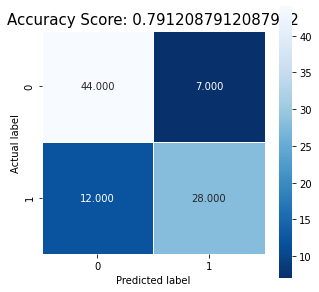

In [29]:
best_model_rf_MCF7_Maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
prediction_mcf7_maccs_rf=best_model_rf_MCF7_Maccs.predict(X_Macc_test_mcf7)
rf_test_mcf7_maccs=permonce_measure(y_Macc_test_mcf7,prediction_mcf7_maccs_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.835


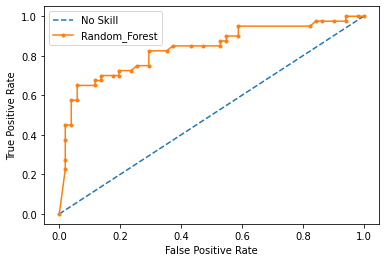

In [30]:
prediction_mcf7_maccs_rf_probs = best_model_rf_MCF7_Maccs.predict_proba(X_Macc_test_mcf7)
roc_auc_mcf7_maccs=roc_auc(y_Macc_test_mcf7,prediction_mcf7_maccs_rf_probs,'Random_Forest')
rf_test_mcf7_maccs.update(roc_auc_mcf7_maccs)

In [31]:
#MCF7_Maccs_RF.to_csv('MCF7_Maccs_RF_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Breast:

In [38]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_breast_maccs = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_breast_maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
print('\n******************************** Done *****************************************************')
Breast_Maccs_RF=pd.DataFrame(grid_search_rf_breast_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done *****************************************************
CPU times: user 30.1 s, sys: 444 ms, total: 30.5 s
Wall time: 2min 56s


In [39]:
print('  Best Parameter are:\n',grid_search_rf_breast_maccs.best_estimator_) # criterion='gini'

  Best Parameter are:
 RandomForestClassifier(max_features='log2', n_estimators=19, random_state=1)


In [40]:
best_model_rf_Breast_Maccs = grid_search_rf_breast_maccs.best_estimator_
#best_model_rf_Breast_Maccs=RandomForestClassifier(criterion = "gini",max_features='log2', n_estimators=67, random_state=1)

In [41]:
rf_breast_maccs_cv,rf_breast_maccs_mean=cv_result(best_model_rf_Breast_Maccs,X_Macc_train_breast,y_Macc_train_breast)

Accuracy: 0.751 
Balanced_accuracy: 0.747 
AUC_Score: 0.811 
Specificity: 0.797 
Sensitivity: 0.698 
MCC: 0.499


In [42]:
rf_breast_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.026972,0.009839,0.795455,0.789829,0.822003,0.872340,0.707317,0.590800
1,0.026931,0.008362,0.715909,0.715361,0.781526,0.723404,0.707317,0.430164
2,0.025107,0.008088,0.727273,0.725000,0.817969,0.750000,0.700000,0.450000
3,0.024643,0.008102,0.758621,0.754255,0.792287,0.808511,0.700000,0.512617
4,0.025019,0.008746,0.758621,0.752394,0.841223,0.829787,0.675000,0.513040


#### Breast Test Set:

Accuracy Score: 0.809
Balanced Accuracy: 0.809
MCC Score: 0.617
Sensitivity Score: 0.804
Specificity Score: 0.814

********************** Graph *****************************



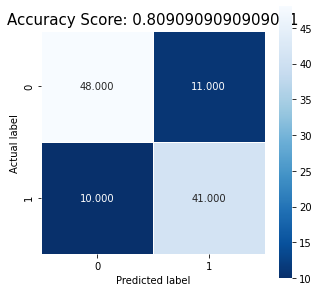

In [43]:
best_model_rf_Breast_Maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
prediction_breast_maccs_rf=best_model_rf_Breast_Maccs.predict(X_Macc_test_breast)
rf_test_breast_maccs = permonce_measure(y_Macc_test_breast,prediction_breast_maccs_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.844


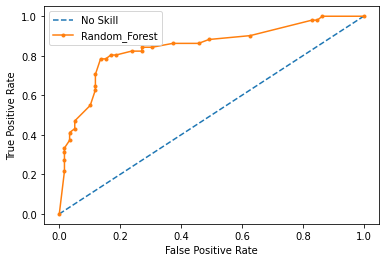

In [44]:
prediction_breast_maccs_rf_probs = best_model_rf_Breast_Maccs.predict_proba(X_Macc_test_breast)
roc_auc_breast_maccs=roc_auc(y_Macc_test_breast,prediction_breast_maccs_rf_probs,'Random_Forest')
rf_test_breast_maccs.update(roc_auc_breast_maccs)

In [39]:
#Breast_Maccs_RF.to_csv('Breast_Maccs_RF_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [40]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_lung_maccs = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_lung_maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
print('\n******************************** Done *****************************************************')
Lung_Maccs_RF=pd.DataFrame(grid_search_rf_lung_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done *****************************************************
CPU times: user 1min 10s, sys: 432 ms, total: 1min 11s
Wall time: 10min 52s


In [41]:
#Lung_Maccs_RF.to_csv('Lung_Maccs_RF_auc.csv',index=False)

In [42]:
print('  Best Parameter are:\n',grid_search_rf_lung_maccs.best_estimator_)

  Best Parameter are:
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=17, random_state=1)


In [43]:
best_model_rf_Lung_Maccs = grid_search_rf_lung_maccs.best_estimator_
#best_model_rf_Lung_Maccs=RandomForestClassifier(criterion='entropy',max_features='sqrt', n_estimators=181, random_state=1)

In [44]:
rf_lung_maccs_cv,rf_lung_maccs_mean=cv_result(best_model_rf_Lung_Maccs,X_Macc_train_lung,y_Macc_train_lung)

Accuracy: 0.687 
Balanced_accuracy: 0.685 
AUC_Score: 0.752 
Specificity: 0.719 
Sensitivity: 0.652 
MCC: 0.374


In [45]:
rf_lung_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.029835,0.009441,0.663158,0.662222,0.722000,0.680000,0.644444,0.324444
1,0.031778,0.011994,0.778947,0.774444,0.841556,0.860000,0.688889,0.559431
2,0.031163,0.009424,0.663158,0.660000,0.716444,0.720000,0.600000,0.322591
3,0.031430,0.010481,0.670213,0.668254,0.729478,0.714286,0.622222,0.338122
4,0.030995,0.010235,0.659574,0.662273,0.752500,0.620000,0.704545,0.324545


#### Lung Test Set:

Accuracy Score: 0.706
Balanced Accuracy: 0.697
MCC Score: 0.415
Sensitivity Score: 0.554
Specificity Score: 0.841

********************** Graph *****************************



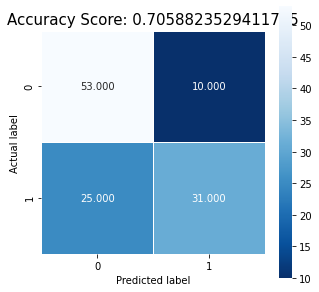

In [46]:
best_model_rf_Lung_Maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
prediction_lung_maccs_rf=best_model_rf_Lung_Maccs.predict(X_Macc_test_lung)
rf_test_lung_maccs = permonce_measure(y_Macc_test_lung,prediction_lung_maccs_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.792


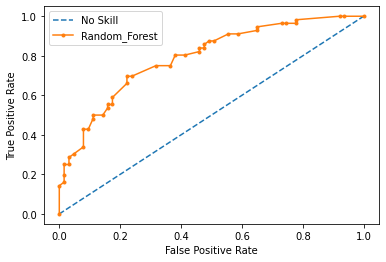

In [47]:
prediction_lung_maccs_rf_probs = best_model_rf_Lung_Maccs.predict_proba(X_Macc_test_lung)
roc_auc_lung_maccs=roc_auc(y_Macc_test_lung,prediction_lung_maccs_rf_probs,'Random_Forest')
rf_test_lung_maccs.update(roc_auc_lung_maccs)

--------------------------------------------------------------------------------------------------------------------

### For A549:

In [48]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_a549_maccs = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_a549_maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
print('\n******************************** Done *****************************************************')
A549_Maccs_RF=pd.DataFrame(grid_search_rf_a549_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done *****************************************************
CPU times: user 47.2 s, sys: 396 ms, total: 47.6 s
Wall time: 9min 46s


In [49]:
#A549_Maccs_RF.to_csv('A549_Maccs_RF_auc.csv',index=False)

In [50]:
print('  Best Parameter are:\n',grid_search_rf_a549_maccs.best_estimator_)

  Best Parameter are:
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=121, random_state=1)


In [51]:
best_model_rf_A549_Maccs = grid_search_rf_a549_maccs.best_estimator_
#best_model_rf_A549_Maccs=RandomForestClassifier(max_features='sqrt', n_estimators=186, random_state=1)

In [52]:
rf_a549_maccs_cv,rf_a549_maccs_mean=cv_result(best_model_rf_A549_Maccs,X_Macc_train_a549,y_Macc_train_a549)

Accuracy: 0.72 
Balanced_accuracy: 0.717 
AUC_Score: 0.812 
Specificity: 0.791 
Sensitivity: 0.644 
MCC: 0.442


In [53]:
rf_a549_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.238114,0.029959,0.733333,0.732143,0.827567,0.750000,0.714286,0.464286
1,0.194671,0.028491,0.700000,0.698661,0.768415,0.718750,0.678571,0.397321
2,0.187381,0.031005,0.716667,0.714683,0.798109,0.774194,0.655172,0.432993
3,0.196621,0.028970,0.633333,0.628476,0.768076,0.774194,0.482759,0.269209
4,0.194704,0.031363,0.816667,0.812570,0.896552,0.935484,0.689655,0.648266


#### A549 Test Set:

Accuracy Score: 0.72
Balanced Accuracy: 0.721
MCC Score: 0.442
Sensitivity Score: 0.75
Specificity Score: 0.692

********************** Graph *****************************



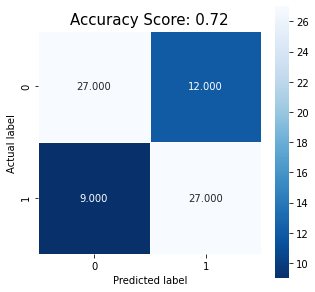

In [54]:
best_model_rf_A549_Maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
prediction_a549_maccs_rf=best_model_rf_A549_Maccs.predict(X_Macc_test_a549)
rf_test_a549_maccs = permonce_measure(y_Macc_test_a549,prediction_a549_maccs_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.784


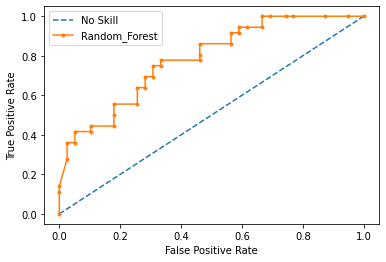

In [55]:
prediction_a549_maccs_rf_probs = best_model_rf_A549_Maccs.predict_proba(X_Macc_test_a549)
roc_auc_a549_maccs=roc_auc(y_Macc_test_a549,prediction_a549_maccs_rf_probs,'Random_Forest')
rf_test_a549_maccs.update(roc_auc_a549_maccs)

---------------------------------------------------------------------------------------------------------------------

## For Morgan2:

### For MCF7:

In [56]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_mcf7_morgan2 = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_mcf7_morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
print('\n******************************** Done ******************************************************')
MCF7_Morgan2_RF=pd.DataFrame(grid_search_rf_mcf7_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done ******************************************************
CPU times: user 1min 11s, sys: 11.6 s, total: 1min 23s
Wall time: 12min 59s


In [57]:
#MCF7_Morgan2_RF.to_csv('MCF7_Morgan2_RF_auc.csv',index=False)

In [58]:
print('  Best Parameter are:\n',grid_search_rf_mcf7_morgan2.best_estimator_)

  Best Parameter are:
 RandomForestClassifier(max_features='sqrt', n_estimators=75, random_state=1)


In [59]:
best_model_rf_MCF7_Morgan2 = grid_search_rf_mcf7_morgan2.best_estimator_
#best_model_rf_MCF7_Morgan2=RandomForestClassifier(max_features='log2', n_estimators=69, random_state=1)

In [60]:
rf_mcf7_morgan2_cv,rf_mcf7_morgan2_mean=cv_result(best_model_rf_MCF7_Morgan2,X_Morgan2_train_mcf7,y_Morgan2_train_mcf7)

Accuracy: 0.813 
Balanced_accuracy: 0.801 
AUC_Score: 0.873 
Specificity: 0.897 
Sensitivity: 0.704 
MCC: 0.62


In [61]:
rf_mcf7_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.190934,0.026536,0.767123,0.751524,0.842226,0.878049,0.625000,0.526001
1,0.177125,0.022730,0.835616,0.826220,0.870046,0.902439,0.750000,0.665766
2,0.151273,0.023452,0.794521,0.775915,0.858994,0.926829,0.625000,0.589417
3,0.161463,0.023541,0.805556,0.793863,0.926042,0.878049,0.709677,0.601118
4,0.157306,0.024112,0.861111,0.856250,0.869531,0.900000,0.812500,0.718132


#### Test set for MCF7:

Accuracy Score: 0.78
Balanced Accuracy: 0.766
MCC Score: 0.553
Sensitivity Score: 0.65
Specificity Score: 0.882

********************** Graph *****************************



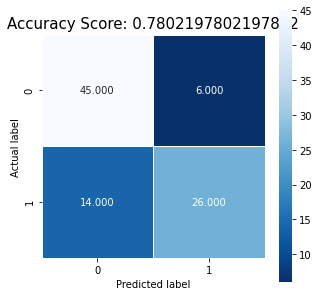

In [62]:
best_model_rf_MCF7_Morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
prediction_mcf7_morgan2_rf=best_model_rf_MCF7_Morgan2.predict(X_Morgan2_test_mcf7)
rf_test_mcf7_morgan2 = permonce_measure(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.832


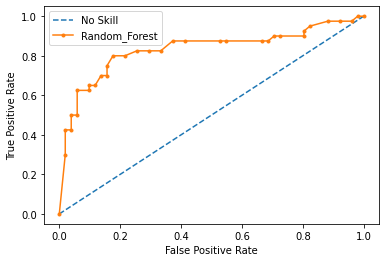

In [63]:
prediction_mcf7_morgan2_rf_probs = best_model_rf_MCF7_Morgan2.predict_proba(X_Morgan2_test_mcf7)
roc_auc_mcf7_morgan2=roc_auc(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_rf_probs,'Random_Forest')
rf_test_mcf7_morgan2.update(roc_auc_mcf7_morgan2)

-------------------------------------------------------------------------------------------------------------------

### For Breast:

In [64]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_breast_morgan2 = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_breast_morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
print('\n******************************** Done ******************************************************')
Breast_Morgan2_RF=pd.DataFrame(grid_search_rf_breast_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done ******************************************************
CPU times: user 1min 26s, sys: 14.1 s, total: 1min 40s
Wall time: 14min 47s


In [65]:
#Breast_Morgan2_RF.to_csv('Breast_Morgan2_RF_auc.csv',index=False)

In [66]:
print('  Best Parameter are:\n',grid_search_rf_breast_morgan2.best_estimator_)

  Best Parameter are:
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=153, random_state=1)


In [67]:
best_model_rf_Breast_Morgan2 = grid_search_rf_breast_morgan2.best_estimator_
#best_model_rf_Breast_Morgan2 = RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=191, random_state=1)

In [68]:
rf_breast_morgan2_cv,rf_breast_morgan2_mean=cv_result(best_model_rf_Breast_Morgan2,X_Morgan2_train_breast,y_Morgan2_train_breast)

Accuracy: 0.798 
Balanced_accuracy: 0.788 
AUC_Score: 0.853 
Specificity: 0.881 
Sensitivity: 0.695 
MCC: 0.599


In [69]:
rf_breast_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.382193,0.041915,0.837209,0.842335,0.890889,0.787234,0.897436,0.682440
1,0.374703,0.043326,0.779070,0.762957,0.816421,0.936170,0.589744,0.570077
2,0.358410,0.044853,0.825581,0.816421,0.902619,0.914894,0.717949,0.651786
3,0.366413,0.045186,0.802326,0.797327,0.873704,0.851064,0.743590,0.600080
4,0.353205,0.043163,0.744186,0.721491,0.780154,0.916667,0.526316,0.490453


#### Test set for Breast:

Accuracy Score: 0.796
Balanced Accuracy: 0.789
MCC Score: 0.589
Sensitivity Score: 0.714
Specificity Score: 0.864

********************** Graph *****************************



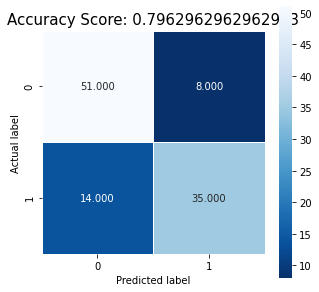

In [70]:
best_model_rf_Breast_Morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
prediction_breast_morgan2_rf=best_model_rf_Breast_Morgan2.predict(X_Morgan2_test_breast)
rf_test_breast_morgan2 = permonce_measure(y_Morgan2_test_breast,prediction_breast_morgan2_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.876


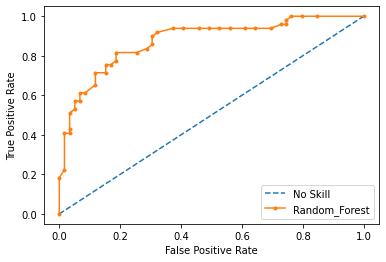

In [71]:
prediction_breast_morgan2_rf_probs = best_model_rf_Breast_Morgan2.predict_proba(X_Morgan2_test_breast)
roc_auc_breast_morgan2=roc_auc(y_Morgan2_test_breast,prediction_breast_morgan2_rf_probs,'Random_Forest')
rf_test_breast_morgan2.update(roc_auc_breast_morgan2)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [72]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_lung_morgan2 = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_lung_morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
print('\n******************************** Done ******************************************************')
Lung_Morgan2_RF=pd.DataFrame(grid_search_rf_lung_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done ******************************************************
CPU times: user 1min 32s, sys: 15.1 s, total: 1min 47s
Wall time: 14min 50s


In [73]:
#Lung_Morgan2_RF.to_csv('Lung_Morgan2_RF_auc.csv',index=False)

In [74]:
print('  Best Parameter are:\n',grid_search_rf_lung_morgan2.best_estimator_)

  Best Parameter are:
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=103, random_state=1)


In [75]:
best_model_rf_Lung_Morgan2 = grid_search_rf_lung_morgan2.best_estimator_
#best_model_rf_Lung_Morgan2 = RandomForestClassifier(max_features='log2', n_estimators=145, random_state=1)

In [76]:
rf_lung_morgan2_cv,rf_lung_morgan2_mean=cv_result(best_model_rf_Lung_Morgan2,X_Morgan2_train_lung,y_Morgan2_train_lung)

Accuracy: 0.734 
Balanced_accuracy: 0.73 
AUC_Score: 0.786 
Specificity: 0.799 
Sensitivity: 0.661 
MCC: 0.468


In [77]:
rf_lung_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.249111,0.030091,0.663158,0.662222,0.772667,0.680000,0.644444,0.324444
1,0.240396,0.030447,0.789474,0.782222,0.853333,0.920000,0.644444,0.591915
2,0.235852,0.029937,0.726316,0.722222,0.752222,0.800000,0.644444,0.451110
3,0.259978,0.030866,0.755319,0.753515,0.788662,0.795918,0.711111,0.509461
4,0.237859,0.031031,0.734043,0.729545,0.764545,0.800000,0.659091,0.464939


#### Test set for Lung:

Accuracy Score: 0.773
Balanced Accuracy: 0.769
MCC Score: 0.545
Sensitivity Score: 0.696
Specificity Score: 0.841

********************** Graph *****************************



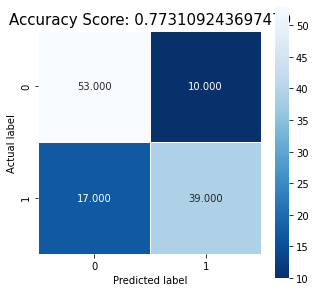

In [78]:
best_model_rf_Lung_Morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
prediction_lung_morgan2_rf=best_model_rf_Lung_Morgan2.predict(X_Morgan2_test_lung)
rf_test_lung_morgan2 = permonce_measure(y_Morgan2_test_lung,prediction_lung_morgan2_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.855


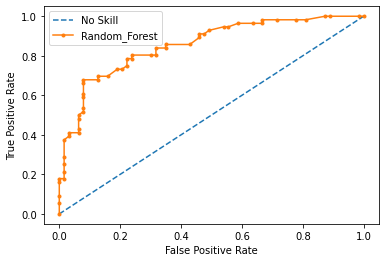

In [79]:
prediction_lung_morgan2_rf_probs = best_model_rf_Lung_Morgan2.predict_proba(X_Morgan2_test_lung)
roc_auc_lung_morgan2=roc_auc(y_Morgan2_test_lung,prediction_lung_morgan2_rf_probs,'Random_Forest')
rf_test_lung_morgan2.update(roc_auc_lung_morgan2)

---------------------------------------------------------------------------------------------------------------------

### For A549:

In [80]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_rf_a549_morgan2 = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_rf_a549_morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
print('\n******************************** Done ******************************************************')
A549_Morgan2_RF=pd.DataFrame(grid_search_rf_a549_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 764 candidates, totalling 3820 fits

******************************** Done ******************************************************
CPU times: user 56 s, sys: 1.43 s, total: 57.4 s
Wall time: 11min 9s


In [81]:
#A549_Morgan2_RF.to_csv('A549_Morgan2_RF_auc.csv',index=False)

In [82]:
print('  Best Parameter are:\n',grid_search_rf_a549_morgan2.best_estimator_)

  Best Parameter are:
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=61, random_state=1)


In [83]:
best_model_rf_A549_Morgan2 = grid_search_rf_a549_morgan2.best_estimator_
#best_model_rf_A549_Morgan2 = RandomForestClassifier(criterion='entropy', max_features='sqrt',n_estimators=46, random_state=1)

In [84]:
rf_a549_morgan2_cv,rf_a549_morgan2_mean=cv_result(best_model_rf_A549_Morgan2,X_Morgan2_train_a549,y_Morgan2_train_a549)

Accuracy: 0.77 
Balanced_accuracy: 0.767 
AUC_Score: 0.828 
Specificity: 0.841 
Sensitivity: 0.693 
MCC: 0.549


In [85]:
rf_a549_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.098134,0.018443,0.816667,0.814732,0.830915,0.843750,0.785714,0.631228
1,0.099321,0.018542,0.733333,0.732143,0.804688,0.750000,0.714286,0.464286
2,0.097951,0.018409,0.700000,0.699666,0.788098,0.709677,0.689655,0.399333
3,0.099326,0.018492,0.733333,0.726363,0.814794,0.935484,0.517241,0.502060
4,0.100652,0.018250,0.866667,0.863181,0.903782,0.967742,0.758621,0.746567


#### Test set for A549:

Accuracy Score: 0.747
Balanced Accuracy: 0.748
MCC Score: 0.496
Sensitivity Score: 0.778
Specificity Score: 0.718

********************** Graph *****************************



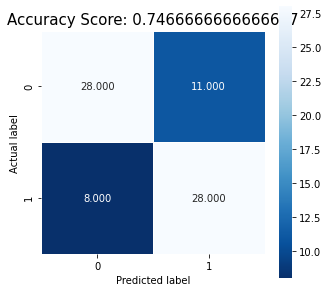

In [86]:
best_model_rf_A549_Morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
prediction_a549_morgan2_rf=best_model_rf_A549_Morgan2.predict(X_Morgan2_test_a549)
rf_test_a549_morgan2 = permonce_measure(y_Morgan2_test_a549,prediction_a549_morgan2_rf)

No Skill: ROC AUC=0.500
ROC AUC=0.845


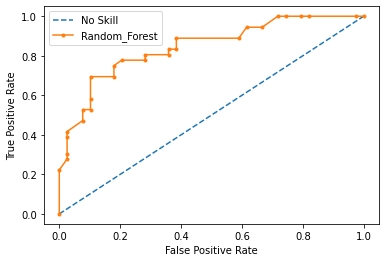

In [87]:
prediction_a549_morgan2_rf_probs = best_model_rf_A549_Morgan2.predict_proba(X_Morgan2_test_a549)
roc_auc_a549_morgan2=roc_auc(y_Morgan2_test_a549,prediction_a549_morgan2_rf_probs,'Random_Forest')
rf_test_a549_morgan2.update(roc_auc_a549_morgan2)

## EnD!

In [88]:
Model = pd.DataFrame({'Model':['RF_MCF7_MACCS','RF_Breast_MACCS','RF_Lung_MACCS','RF_A549_MACCS','RF_MCF7_MORGAN2','RF_Breast_MORGAN2','RF_Lung_MORGAN2','RF_A549_MORGAN2']})
parameters=pd.DataFrame([grid_search_rf_mcf7_maccs.best_params_,grid_search_rf_breast_maccs.best_params_,grid_search_rf_lung_maccs.best_params_,grid_search_rf_a549_maccs.best_params_,grid_search_rf_mcf7_morgan2.best_params_,grid_search_rf_breast_morgan2.best_params_,grid_search_rf_lung_morgan2.best_params_,grid_search_rf_a549_morgan2.best_params_])
test_set=pd.DataFrame([rf_test_mcf7_maccs,rf_test_breast_maccs,rf_test_lung_maccs,rf_test_a549_maccs,rf_test_mcf7_morgan2,rf_test_breast_morgan2,rf_test_lung_morgan2,rf_test_a549_morgan2])
cv_set=pd.DataFrame([rf_mcf7_maccs_mean,rf_breast_maccs_mean,rf_lung_maccs_mean,rf_a549_maccs_mean,rf_mcf7_morgan2_mean,rf_breast_morgan2_mean,rf_lung_morgan2_mean,rf_a549_morgan2_mean])
final_result=pd.concat([Model,parameters,cv_set,test_set],axis=1)
final_result

,Model,criterion,max_features,n_estimators,Accuracy,Balanced Accuracy,AUC_Score,Specificity,Sensitivity,MCC,Accuracy_test,Balanced Accuracy_test,MCC Score_test,Sensitivity Score_test,Specificity Score_test,AUC_Score_test
0,RF_MCF7_MACCS,entropy,sqrt,195,0.793,0.788,0.868,0.833,0.742,0.585,0.791,0.781,0.574,0.700,0.863,0.835
1,RF_Breast_MACCS,entropy,log2,131,0.767,0.760,0.830,0.831,0.690,0.529,0.787,0.781,0.569,0.714,0.847,0.843
2,RF_Lung_MACCS,entropy,sqrt,17,0.687,0.685,0.752,0.719,0.652,0.374,0.706,0.697,0.415,0.554,0.841,0.792
3,RF_A549_MACCS,entropy,sqrt,121,0.720,0.717,0.812,0.791,0.644,0.442,0.720,0.721,0.442,0.750,0.692,0.784
4,RF_MCF7_MORGAN2,gini,sqrt,75,0.813,0.801,0.873,0.897,0.704,0.620,0.780,0.766,0.553,0.650,0.882,0.832
5,RF_Breast_MORGAN2,entropy,sqrt,153,0.798,0.788,0.853,0.881,0.695,0.599,0.796,0.789,0.589,0.714,0.864,0.876
6,RF_Lung_MORGAN2,entropy,sqrt,103,0.734,0.730,0.786,0.799,0.661,0.468,0.773,0.769,0.545,0.696,0.841,0.855
7,RF_A549_MORGAN2,entropy,sqrt,61,0.770,0.767,0.828,0.841,0.693,0.549,0.747,0.748,0.496,0.778,0.718,0.845
